<center>  <h1>Welcome to the First Challenge!</h1></center>


### Goals
* Get comfortable working in jupyter notebooks
* Get practice with some of the basic functionality in Pandas, especially in regards to DataFrames and Series.
* Explore a classic data set, and write our fist classifier!

### How To Make Use of This Notebook:

Jupyter notebooks are awesome, and a big part of the first lesson will be making sure that you're awesome at using them!  Here are a couple pro-tips on how to make the best use of this notebook during this exercise:

1. ** Take notes right in the middle of the notebook--its just markdown and html!**  Double click on this cell to explore the markdown that makes the cell so pretty, and to read a secret message about your instructor<!--THAT ISN'T ALAN's REAL HAIR COLOR!!!-->. If you see a place where you want to make a note in markdown, highlight any cell and then go up to "Insert" on the menu above. You can insert a cell above or below any other cell in the notebook.  You can also change cells from markdown to code, and vice versa.  


2.  **Make use of all the cool IPython magic commands.**  Don't understand a function?  Call it with a question mark a at the end to see the documentation for it (or a double question mark to see the actual code for that function!).  Want to use ls to see what a file name is called, but don't want to have to open a pesky terminal window?  Just use % ls!  For a full look at the Ipython documentations and all the cool magic commands contained therein, select "Help" in the menu bar and follow the link to Ipython's Docs.  



3.  **Poke around in the code!**  Don't understand how something works?  Change the code around until you do.  The great thing about Jupyter Notebooks is that each cell can be run individually, which will save you a ton of time and headaches.  To run any cell, just highlight the cell and press shift + enter.  In a code cell, this will run the code.  In a markdown cell, this will render the markdown.  Each time you run a code cell, the output number to the left of the cell will increment by 1.  Be sure to pay attention to this if you start running cells out of order.  Finally, if you want to run all cells at the same time (sequentially, starting from the top and working downwards), you can find that option inside the "Cell" menu up top.  


For this exercise, we'll be working with the famous <a href="https://archive.ics.uci.edu/ml/datasets/Iris">Iris Data Set</a>, courtesy of the <a href="https://archive.ics.uci.edu/ml/datasets.html">UC Irvine Machine Learning Data Set Repository.</a>  This data set consists of measurements of 150 different Iris flowers--50 Iris Setosa, 50 Iris Virginicas, and 50 Iris Versicolors.

| <center>Iris Setosa</center> | <center>Iris Virginica</center> | <center>Iris Versicolor</center> |
|-------------|----------------|-----------------|
| <img src="iris-setosa.jpg" width=200 height =200>|<img src="iris-virginica.jpg" width=200 height =200>           | <img src="iris-versicolor.jpg" width=200 height =200>            |


#### Data Wrangling in Pandas

We'll start by importing the data from a .txt file into a Pandas Dataframe.  This will give us some practice importing data, and using Pandas Dataframes in organize and manipulate data as needed.  


#### Visualizing Data with Matplotlib

Next, we'll explore our data set by generating some summary statistics on what we're looking at.  More importantly, we'll visualize our data set to see if anything stands out to us. We'll also take a quick detour to look at an example of how summary statistics can be misleading, and why we should always *visualize our data!*

#### Writing a Classifier

The final thing we'll do is to write a basic classifier using sklearn.  Don't get discouraged if you don't understand what is going on in this step.  Our only goal here is to demystify the basic process of creating a model using machine learning algorithms.  It's NOT important that you understand the code at this point--instead, focus on the general steps that make up the process: splitting our data into **_Training_** and **_Testing_**, training our model, and validating it using testing data. 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# This is a magic command that will make all the pretty matplotlib visualizations appear inline for this notebook
%matplotlib inline

# Uncomment the following line(s) to see examples of how cool Ipython Magic Commands are!
# pd.read_csv??
# pd.read_csv??
# % ls

<center> <h2>Part 1:  Data Wrangling</h2></center>

**We'll begin** by reading our data set into a Dataframe.  There are two main object types in pandas that we'll want to get comortable with: *Series* and *Dataframe*.  It's important that you understand the quirks and use cases of each ASAP, because the sooner we understand our tools, the sooner we can start focusing on the fun stuff.  

A Pandas **_Series_** is a 1-dimensional array of data.  Python rules still apply, so the data contained can be heterogeneous--that is, the list can still contain multiple data types.  You can think of a series as a single row or single column of values from a table.  (Pro-tip:  If you want to sanitize the data in a series by making it all the same type, cast it to a numpy array before creating the Series object!  Example below).  Pandas Series Documentation available <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html">here</a>!

A Pandas **_Dataframe_** is a multidimensional container of data.  The easiest way to understand dataframes is to think of them as multidimensional arrays, or matrices.  Under the hood, they're basically a dictionary of multiple Series. Each individual row or column can be accessed as a Series, and Dataframes have all kinds of cool bells and whistles that allow you to add, drop, manipulate, or sort columns or rows based off of conditionals for the values in a given row or column.  This makes dataframes really powerful for preprocessing, when you're cleaning your data set and getting it in an acceptable state to run through an ML algorithm.  A common example might be something like replacing all empty cells in a column with the mean value for that column, or grabbing all the rows that meet a condition for a certain column.  Pandas Dataframe Documentation available <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html">here</a>!

Play around with the examples below for a minute to make sure you understand what's going on, and then move on to the cell where we read in our Iris data.  

In [3]:
# Let's create a small heterogeneous list that we'll turn into a Series.
x = [1, 2, "hello", True]

# Create a series object, and use a list comprehension to print out the type of every item inside the series.  Notice 
# That they all maintain their original types...
series_example = pd.Series(x)
print([type(i) for i in series_example])

# Now we create an example with sanitized types by creating a numpy array, and using that to create our Series.  
# Notice the difference?  Since there were multiple types, numpy just cast them all to Strings for us.  
typesafe_example = pd.Series(np.array(x))
print([type(i) for i in typesafe_example])
# print([i for i in typesafe_example])

[<class 'int'>, <class 'int'>, <class 'str'>, <class 'bool'>]
[<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>]


### Cool! Now, lets load in our data set.  

In [19]:
# # Create a dataframe by reading the csv file using pd.read_csv()
# df = pd.read_csv("iris.csv", index_col=False)
# columnn_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
# df.columns = columnn_names
# # Next, let's take a look at our dataframe.  We can do this by printing the dataframe, 
# # or we can just type the name of variable see what it contains.
# # Uncomment each of these lines and compare the output. Notice that calling print shows the data, 
# # while calling the data frame object itself actually spits out a table with borders and everything!

# # print(df)
# df


# # Next, let's start by examining the summary statistics of our data set.  We'll use the .describe() method
# # CALL df.describe() on the line below. 

# df.describe()


# DERMATOLOGY DATA FROM UCI
df = pd.read_csv("dermatology.csv", index_col=False)
column_names = ["erythema", "scaling", "definite borders", "itching", "koebner phenomenon",
               "polygonal papules", "follicular papules", "oral mucosal involvement", "knee and elbow involvement",
               "scalp involvement", "family history", "melanin incontinence", "eosinophils in the infiltrate",
               "PNL infiltrate", "fibrosis of the papillary dermis", "exocytosis", "acanthosis", "hyperkeratosis",
               "parakeratosis", "clubbing of the rete ridges", "elongation of the rete ridges",
               "thinning of the suprapapillary epidermis", "spongiform pustule", "munro microabcess",
               "focal hypergranulosis", "disappearance of the granular layer",
               "vacuolisation and damage of basal layer", "spongiosis", "saw-tooth appearance of retes",
               "follicular horn plug", "perifollicular parakeratosis", "inflammatory monoluclear inflitrate",
               "band-like infiltrate", "age", "class"]
df.columns = column_names

# print(df)
df

# Examine our data
df.describe()


,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,class
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.068493,1.794521,1.553425,1.361644,0.635616,0.449315,0.167123,0.378082,0.613699,0.520548,...,0.394521,0.465753,0.457534,0.947945,0.454795,0.104110,0.115068,1.868493,0.556164,2.805479
std,0.665656,0.702408,0.905126,1.136632,0.908653,0.958353,0.571304,0.835057,0.984120,0.906472,...,0.850322,0.865743,0.955884,1.126615,0.955758,0.451018,0.489357,0.725682,1.107044,1.599441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


<center><h1>That was FAST.</h1></center>

<img src="fast.gif">

You've probably got alot of practice reading data the traditional way in Python:

`with f as open("iris.csv"):`

`...`

Although you'd likely have no problem reading all the data, storing it in arrays, and building your data set/calculating statistics from scratch, this way is muuuuuch quicker. Although there is certainly value in understanding the methodology behind manually reading, cleaning, and manipulating data in python, that's not our goal here.  There are a TON of cool things that Pandas and Numpy can do for us.  As a rule of thumb, check the docs before coding something up yourself.  If Pandas can do it for you, let it!  This will free up time for you to work on more meaningful tasks, and will be less likely to have bugs, since the libraries we're using are Open-Source and run by robust communities of volunteers.  

<center><h1>Step 2:  Visualizing Our Data</h1></center>

Okay, so we've read our data into a Dataframe and have taken a look at the summary statistics using our handy-dandy `.describe()` method.  Before we move into writing our classifier, lets examine our summary statistics, and see if there is anything valuable to us here.  

Our goal is to correctly classify each iris based on the length/width of the petals and sepals. Take a look at our summary statistics and ask yourself what value we can get out of this information. Think about the following questions:

* Is this information valuable?  Why should we bother looking at summary statistics at all?
* Can we answer our question just using summary statistics?
* Is there anything in the data that stands out to us?

As you probably guessed, the summary statistics aren't very useful on their own.  In the best case, they can give us intuition about the data set we're working with.  However, this isn't always the case, and doesn't seem to be here.  In some cases, summary statistics can even be misleading (more on that later)!  In this lesson, we won't spend any time discussing the various summary statistics and what they *could* tell us, but that doesn't mean you shouldn't know them.  As a rule of thumb, if you don't understand any of outputs of the .describe() method, consider reviewing descriptive statistics. There will come a time where you'll need to understand what standard deviation is and why it's important!

A more intuitive way of understanding our data set is to **_visualize_** it.  When in doubt, plot the data!  We'll use the **_matplotlib_** library to create visualizations of our data set that should help us get a feel for what we're working with.  

We have labels for all of instances, so let's graph some stuff!  Our goal here is to get a feel for our data by seeing if we can visually identify trends in the data.  On top of that, this is good practice for manipulating data inside of dataframes, and its always fun to graph stuff using matplotlib!

We'll start by splitting our main dataframe into 3 different dataframes, separated by iris type (as denoted in the "class" label.  Then, we'll start visualizing.  

<center><h1>But wait! What sort of graph should I choose?</h1></center>

There's no right answer here, so don't worry if figuring out how you should display your data seems a little daunting.  This is an exploratory phase--some visualizations will be much more useful than others, but there's no real correct answer for which one would be best. 

We'll use a **_scatterplot_**, since it seems to fit pretty intuitively with our data set.  We have three different types of flowers, and measurements on the length and width of the petals and sepals.  Let's start by plotting the sepal lengths and widths of all flowers, but denote each type with its own color.  If we get lucky, we'll be able to see some visual trends based on the type of flower.  

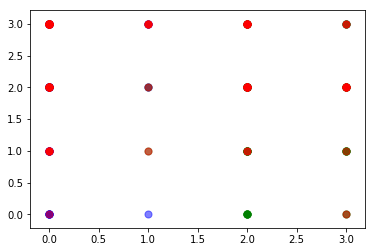

In [38]:
# # We'll use the Dataframe's .loc method to grab all rows that contain a certain value or meet a condition, and store 
# # them in a smaller dataframe.  Pay attention to the weird syntax, it's easy to mess this step up!

# setosas = df.loc[df["class"] == 0]
# virginicas = df.loc[df["class"] == 1]
# versicolors = df.loc[df["class"] == 2]

# # Now that we have separated the rows by flower class, let's go ahead and start plotting them on a graph. We'll 
# # Plot all of them on the same graph, but use different colors depending on the flower type.  This will make it easy 
# # To see any trends that are specific to the flower types.  

# # We'll start by plotting the sepal lengths and widths of each on a scatter plot.  We'll make each different iris a 
# # different color.  Make sure we set the alpha to .5 or lower, so that we can still see our points well when they
# # overlap.   

# setosa_sepal_data = [setosas["sepal_width"], setosas["sepal_length"]]
# virginica_sepal_data =[virginicas["sepal_width"], virginicas["sepal_length"]] 
# versicolor_sepal_data = [versicolors["sepal_width"], versicolors["sepal_length"]]
# sepal_plot = plt.scatter(setosa_sepal_data[0], setosa_sepal_data[1], s=50, alpha=0.5, c='g')
# plt.scatter(virginica_sepal_data[0], virginica_sepal_data[1], s=50, alpha=0.5, c='b')
# plt.scatter(versicolor_sepal_data[0], versicolor_sepal_data[1], s=50, alpha=0.5, c='r')

class1 = df.loc[df["class"] == 1]
class2 = df.loc[df["class"] == 2]
class3 = df.loc[df["class"] == 3]
class4 = df.loc[df["class"] == 4]
class5 = df.loc[df["class"] == 5]
class6 = df.loc[df["class"] == 6]

class1_age_data = [class1["spongiosis"], class1["scaling"], class1["itching"]]
class2_age_data = [class2["spongiosis"], class2["scaling"], class2["itching"]]
class3_age_data = [class3["spongiosis"], class3["scaling"], class3["itching"]]
class4_age_data = [class4["spongiosis"], class4["scaling"], class4["itching"]]
class5_age_data = [class5["spongiosis"], class5["scaling"], class5["itching"]]
class6_age_data = [class6["spongiosis"], class6["scaling"], class6["itching"]]
derma_plot = plt.scatter(class5_age_data[0], class5_age_data[2], s=50, alpha=0.5, c='b')
plt.scatter(class2_age_data[0], class2_age_data[2], s=50, alpha=0.5, c='g')
plt.scatter(class3_age_data[0], class3_age_data[2], s=50, alpha=0.5, c='r')




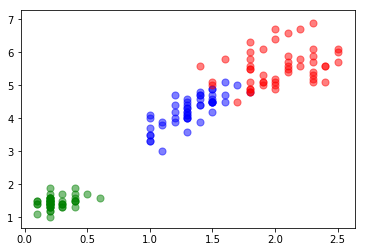

In [22]:
# Now let's repeat the process with our petal data.

setosa_petal_data = [setosas["petal_width"], setosas["petal_length"]]
virginica_petal_data = [virginicas["petal_width"], virginicas["petal_length"]]
versicolor_petal_data = [versicolors["petal_width"], versicolors["petal_length"]]

petal_plot = plt.scatter(setosa_petal_data[0], setosa_petal_data[1], s=50, alpha=0.5, c='g')
plt.scatter(virginica_petal_data[0], virginica_petal_data[1], s=50, alpha=0.5, c='b')
plt.scatter(versicolor_petal_data[0], versicolor_petal_data[1], s=50, alpha=0.5, c='r')

<center><h1>Interesting....</h1></center>

<center><img src="interesting.gif" height=400 width =400></center>

### That's a good sign!

We can clearly see some trends in the data. We've gotten a lot more information about our data set just by visualizing it.  Although it wasn't immediately obvious by looking at the summary statistics, our visualizations tell us 2 important things:

1.  There are some natural clusters in our data.
2.  Our data is NOT linearly separable--that is, we can't draw a line to cleanly separate all our different groups.  

This may not mean much to you now, but by the end of the course, it will!  

A final note on data exploration:  you may think that this step is boring, unnecessary, or optional--why not just go right into building our classifier?  The answer is that without a solid understanding of the shape of your data, you're flying blind.  Could you just build a model and be done with it?  Sure--but how would you know if you could *trust* your classifier?  How would you know which machine learning algorithm(s) to choose for your model in the first place?  Data exploration is a crucial step in machine learning because it can give us information that points us in the right direction, as well as intuition that can help us determine if we can *trust* our model.


<center><h1>Step 3:  Creating a Classifier</h1></center>

### "All models are wrong.  Some are useful."  --George Box

There's **_A LOT_** of important foundational knowledge that we need to know before we can effectively make use of machine learning algorithms.  We need to learn what sorts of questions machine learning can answer, get a feel for the types of questions we should ask when trying to solve a problem, what sorts of models we can use, how to train a model, and how to tell if we can trust our model once it's built. 

We may not have covered this foundational stuff yet, but we're going to build a model anyways.  Don't worry if you don't understand what's going on yet--that's okay, you will soon.  We'll build a classifier  now, just so you can get a feel for the process, and what it looks like to train, test, and validate a model.  In a few weeks, once you've learned the foundational stuff, see if you can come back to this and see if you understand it.  Bonus points if you can improve the accuracy of the model!

In [8]:
# Start by importing scikit-learn (everyone just calls it sklearn, for short)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
# Split data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, df["class"],  test_size=0.30, random_state=42)

# Create a Gaussian Naive Bayes object using sklearn
clf = GaussianNB()
# fit the model using our training data 
clf.fit(X_train,y_train)
# We have a fully trained model, let's run our test set through it and see how we did!
y_pred = clf.predict(X_test)
# Use sklearn to compute F1 score based on predictions, actual labels for testing set
results = f1_score(y_test, y_pred, average=None)
# Lets make our output a little more readable...
print("Predicted Setosas with {}% accuracy".format(results[0] * 100))
print("Predicted Virginicas with {}% accuracy".format(results[1] * 100))
print("Predicted Versicolors with {}% accuracy".format(results[2] * 100))

Predicted Setosas with 100.0% accuracy
Predicted Virginicas with 100.0% accuracy
Predicted Versicolors with 100.0% accuracy
